In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d tuanai/traffic-signs-dataset

 97% 225M/232M [00:03<00:00, 91.1MB/s]
100% 232M/232M [00:03<00:00, 68.6MB/s]


In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!unzip /content/traffic-signs-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: DATA/16/016_1_0055.png  
  inflating: DATA/16/016_1_0056.png  
  inflating: DATA/16/016_1_0057.png  
  inflating: DATA/16/016_1_0058.png  
  inflating: DATA/16/016_1_0059.png  
  inflating: DATA/16/016_1_0060.png  
  inflating: DATA/16/016_1_0061.png  
  inflating: DATA/16/016_1_0062.png  
  inflating: DATA/16/016_1_0063.png  
  inflating: DATA/16/016_1_0064.png  
  inflating: DATA/16/016_1_0065.png  
  inflating: DATA/16/016_1_0066.png  
  inflating: DATA/16/016_1_0067.png  
  inflating: DATA/16/016_1_0068.png  
  inflating: DATA/16/016_1_0069.png  
  inflating: DATA/16/016_1_0070.png  
  inflating: DATA/17/017_0001.png    
  inflating: DATA/17/017_0001_j.png  
  inflating: DATA/17/017_0002.png    
  inflating: DATA/17/017_0002_j.png  
  inflating: DATA/17/017_0003.png    
  inflating: DATA/17/017_0003_j.png  
  inflating: DATA/17/017_0004.png    
  inflating: DATA/17/017_0004_j.png  
  inflating: DATA/17/017_0005.png    

Load and prepare images

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [69]:
train_path = "/content/DATA"
test_path = "/content/TEST"
batch_size = 32
image_size = (180, 180)

In [72]:
train_image_gen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=10,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
test_image_gen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=10,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [73]:
train_data = train_image_gen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
)
test_data = test_image_gen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
)

Found 5683 images belonging to 52 classes.
Found 433 images belonging to 52 classes.


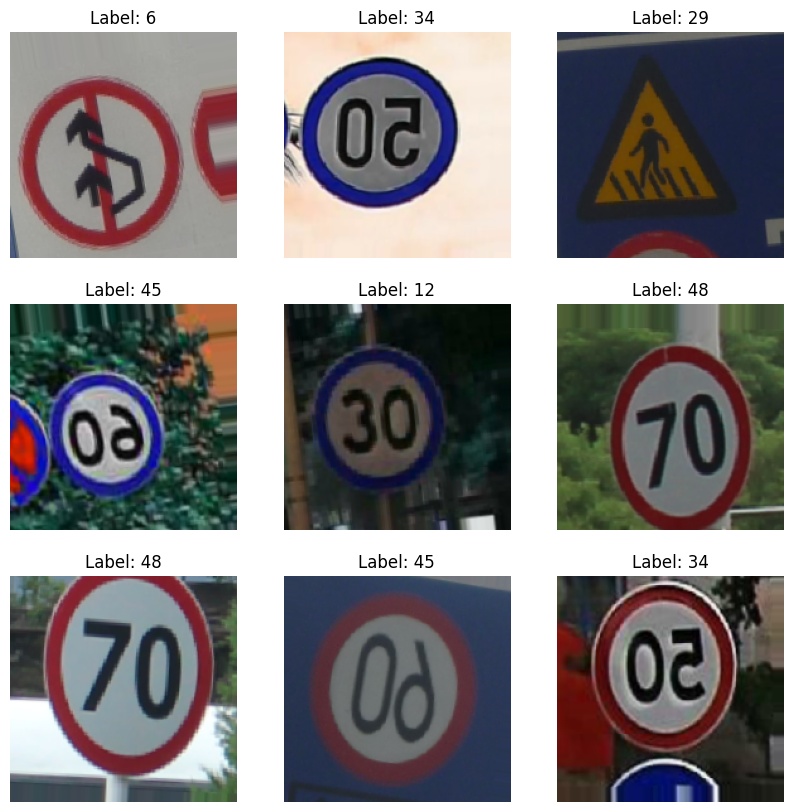

In [100]:
images, labels = next(train_data)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    label_index = labels[i].argmax()
    plt.title(f'Label: {label_index}')
    plt.axis('off')
plt.show()

In [101]:
from tensorflow import keras

In [121]:
model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=3, input_shape=(180, 180, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(52, activation="softmax")
])

In [111]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 178, 178, 64)      1792      
                                                                 
 batch_normalization_15 (Ba  (None, 178, 178, 64)      256       
 tchNormalization)                                               
                                                                 
 activation_15 (Activation)  (None, 178, 178, 64)      0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 89, 89, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 87, 87, 64)        36928     
                                                                 
 batch_normalization_16 (Ba  (None, 87, 87, 64)       

In [113]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

In [114]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [115]:
history = model.fit(train_data, epochs=30, validation_data=test_data, callbacks=[early_stopping], batch_size=batch_size)

Epoch 1/30
178/178 [==============================] - 61s 318ms/step - loss: 2.3816 - accuracy: 0.4336 - val_loss: 3.8949 - val_accuracy: 0.0416
Epoch 2/30
178/178 [==============================] - 55s 311ms/step - loss: 1.2887 - accuracy: 0.6836 - val_loss: 3.3497 - val_accuracy: 0.1316
Epoch 3/30
178/178 [==============================] - 58s 326ms/step - loss: 0.9045 - accuracy: 0.7679 - val_loss: 1.8810 - val_accuracy: 0.4896
Epoch 4/30
178/178 [==============================] - 56s 313ms/step - loss: 0.6499 - accuracy: 0.8327 - val_loss: 1.3147 - val_accuracy: 0.6236
Epoch 5/30
178/178 [==============================] - 56s 317ms/step - loss: 0.4850 - accuracy: 0.8772 - val_loss: 1.2081 - val_accuracy: 0.6674
Epoch 6/30
178/178 [==============================] - 57s 318ms/step - loss: 0.3846 - accuracy: 0.8981 - val_loss: 0.9083 - val_accuracy: 0.7021
Epoch 7/30
178/178 [==============================] - 55s 311ms/step - loss: 0.3329 - accuracy: 0.9110 - val_loss: 0.7560 - val_ac

In [116]:
model.evaluate(test_data)

14/14 [==============================] - 3s 241ms/step - loss: 0.4956 - accuracy: 0.8360


[0.49563777446746826, 0.8360277414321899]

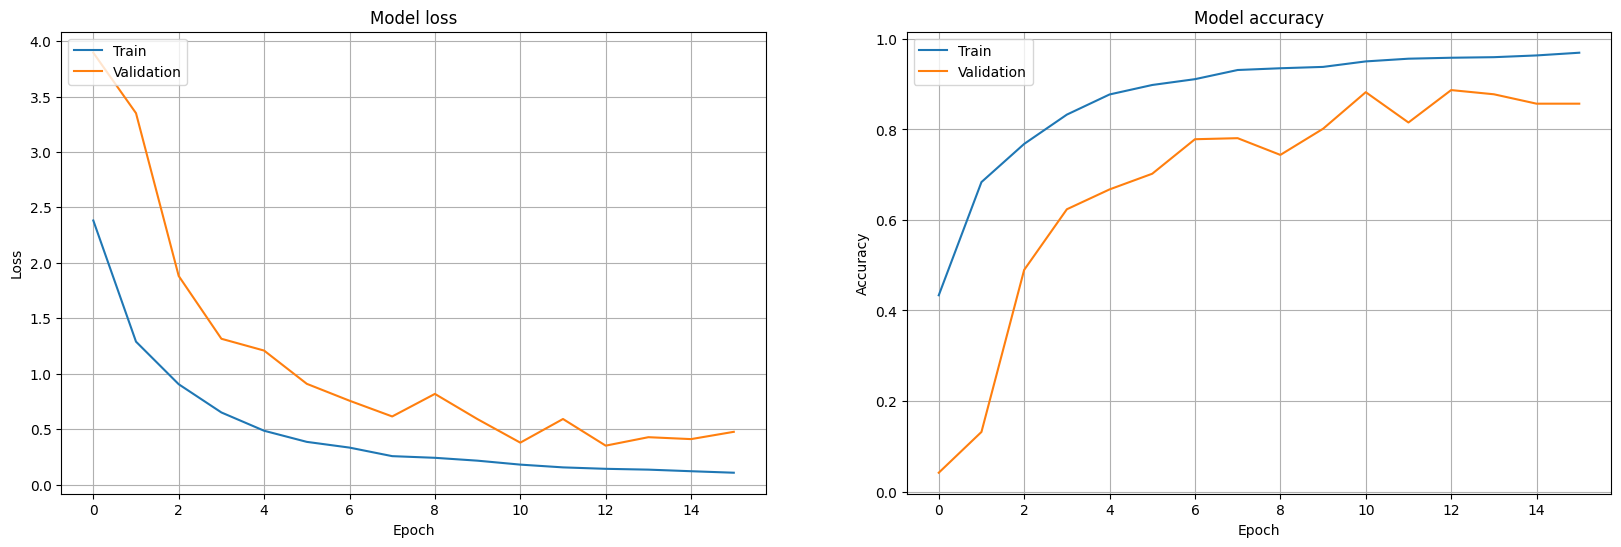

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Model loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper left')
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Model accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='upper left')
ax[1].grid(True)
plt.show()